<a href="https://colab.research.google.com/github/omar-kotb/DAT550-UiS-Group-17/blob/main/Project550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---


## **Data exploration and cleaning**

---



---



In [ ]:
# Import neccessary packages
from IPython.display import Image, display
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import requests
import joblib
import re

# Used to fetch fitted model and features array
from google.colab import drive

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.neighbors import NearestNeighbors

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Upload dataset
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 28k_apparel_data.csv to 28k_apparel_data.csv
User uploaded file "28k_apparel_data.csv" with length 3342545 bytes


In [ ]:
# Read the display the dataset
data_information = pd.read_csv('28k_apparel_data.csv',sep=",", encoding='utf-8')
data_information = data_information.drop('Unnamed: 0', axis=1)

data_information

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
1,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
2,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
3,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
4,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53
...,...,...,...,...,...,...,...
17588,B01MRV2IFS,YueLian,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,YueLian Women's Chiffon Short Sleeves Sun Prot...,$19.25
17589,B01LY4QWLF,Vintage America,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Vintage America Women's Large Lace Up Collared...,$23.24
17590,B07167SCNH,Tart Collections,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"Tart Womens Collections Ann Wrap Top, Xs, Black",$29.99
17591,B07575N2WX,Soprano,Gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,Soprano Womens Small Tie-Fringe Slub-Knit Tank...,$22.83


In [ ]:
# Check for null values
null_counts = data_information.isnull().sum()
print(null_counts)

data_information = data_information.dropna()

asin                  0
brand                50
color                 0
medium_image_url      0
product_type_name     0
title                 0
formatted_price       0
dtype: int64


In [ ]:
# Check for valid ASIN and duplicates
data_information = data_information[data_information['asin'].str.startswith('B')]
duplicates = data_information[data_information.duplicated('asin', keep=False)]

# Display the duplicated rows
print(len(duplicates))


0


In [ ]:
# Fix price formatting and removing invalid values
data_information = data_information.query('formatted_price != "Too low to display"')

data_information['formatted_price'] = data_information['formatted_price'].str.replace('\$', '', regex=True).str.replace(',', '', regex=True).astype(float)

<ipython-input-7-562dc8772c8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_information['formatted_price'] = data_information['formatted_price'].str.replace('\$', '', regex=True).str.replace(',', '', regex=True).astype(float)


In [ ]:
# Quality clean the color column as it includes lots of characters we can classify as noise
data_information['color'] = data_information['color'].str.lower()

# Remove symbols and integers
data_information['color'] = data_information['color'].str.replace('[#,\-\'"_*.x:]', '', regex=True)
data_information['color'] = data_information['color'].str.replace('\d+', '', regex=True)

# Removing as much noise as we see in the data
data_information['color'] = data_information['color'].str.replace('womens', '', regex=True)
data_information['color'] = data_information['color'].str.replace('women', '', regex=True)
data_information['color'] = data_information['color'].str.replace('packs', '', regex=True)
data_information['color'] = data_information['color'].str.replace('pack', '', regex=True)
data_information['color'] = data_information['color'].str.replace('as the pictures', '', regex=True)
data_information['color'] = data_information['color'].str.replace('as the picture', '', regex=True)
data_information['color'] = data_information['color'].str.replace('as pictures', '', regex=True)
data_information['color'] = data_information['color'].str.replace('as picture', '', regex=True)
data_information['color'] = data_information['color'].str.replace('as photos', '', regex=True)
data_information['color'] = data_information['color'].str.replace('as photo', '', regex=True)
data_information['color'] = data_information['color'].str.replace('colours', '', regex=True)
data_information['color'] = data_information['color'].str.replace('colour', '', regex=True)
data_information['color'] = data_information['color'].str.replace('colors', '', regex=True)
data_information['color'] = data_information['color'].str.replace('color', '', regex=True)

# Fixing vocabulary to match each other
data_information['color'] = data_information['color'].str.replace('multicoloured', 'multi', regex=True)
data_information['color'] = data_information['color'].str.replace('multicolored', 'multi', regex=True)
data_information['color'] = data_information['color'].str.replace('multicolor', 'multi', regex=True)
data_information['color'] = data_information['color'].str.replace('gray', 'grey', regex=True)

# Fix formatting
data_information['color'] = data_information['color'].str.replace('[/+]', ' ', regex=True)
data_information['color'] = data_information['color'].str.replace('and', ' ', regex=True)

# Remove invalid values (< 2 characters value)
data_information['color'] = data_information['color'].str.strip()
data_information = data_information[data_information['color'].str.len() >= 3]

data_information

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B004GSI2OS,FeatherLite,ony black stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,26.26
1,B012YX2ZPI,HX-Kingdom Fashion T-shirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,9.99
2,B003BSRPB0,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,20.54
3,B014ICEJ1Q,FNC7C,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,7.39
4,B0079BMKDS,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,13.53
...,...,...,...,...,...,...,...
17588,B01MRV2IFS,YueLian,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,YueLian Women's Chiffon Short Sleeves Sun Prot...,19.25
17589,B01LY4QWLF,Vintage America,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Vintage America Women's Large Lace Up Collared...,23.24
17590,B07167SCNH,Tart Collections,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"Tart Womens Collections Ann Wrap Top, Xs, Black",29.99
17591,B07575N2WX,Soprano,grey,https://images-na.ssl-images-amazon.com/images...,SHIRT,Soprano Womens Small Tie-Fringe Slub-Knit Tank...,22.83


In [ ]:
# Setup array of product types
type_counts = data_information['product_type_name'].value_counts()
ordered_product_types = type_counts.index.tolist()

# Array of non clothes product types
not_wanted = ["BOOKS_1973_AND_LATER", "TOYS_AND_GAMES", "TOOLS", "OFFICE_PRODUCTS", "SOUND_AND_RECORDING_EQUIPMENT", "MECHANICAL_COMPONENTS", "POWERSPORTS_VEHICLE_PART", "INSTRUMENT_PARTS_AND_ACCESSORIES", "MUSIC_POPULAR_VINYL", "GOLF_CLUB", "HARDWARE", "AUTO_PART", "PET_SUPPLIES", "VIDEO_DVD", "SAFETY_SUPPLY", "HEALTH_PERSONAL_CARE", "HOME"]

# Variables used for graphing non clothes product types and the replacement
non_clothes_types = data_information[data_information['product_type_name'].isin(not_wanted)]
non_clothes_types_fix = non_clothes_types

# Amount of rows found an replacement for
rows_replaced = 0

# Go through each non clothes product types
for product_type in not_wanted:
    # Find all entries with this product type
    filtered_data = data_information[data_information['product_type_name'] == product_type]

    # Iterate over the entries in the filtered data
    for index, row in filtered_data.iterrows():

        # Iterate over the ordered product types
        for type in ordered_product_types:

            # Check if the type occurs in the title of the current row
            if type.lower() in row['title'].lower():
                # Replace the 'product_type_name' in the current row with the found type
                rows_replaced += 1
                data_information.at[index, 'product_type_name'] = type

                # Update the variables used for graphing non clothes product types
                current_asin = row['asin']
                non_clothes_types_fix.loc[non_clothes_types_fix['asin'] == current_asin, 'product_type_name'] = type

                # Break out of the loop after replacing (So it only finds one replacement)
                break

# Remove all entries till having invalid product types
data_information = data_information[~data_information['product_type_name'].isin(not_wanted)]
print("Amount of rows where a replacement was found: " + str(rows_replaced))

data_information

Amount of rows where a replacement was found: 1128


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B004GSI2OS,FeatherLite,ony black stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,26.26
1,B012YX2ZPI,HX-Kingdom Fashion T-shirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,9.99
2,B003BSRPB0,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,20.54
3,B014ICEJ1Q,FNC7C,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,7.39
4,B0079BMKDS,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,13.53
...,...,...,...,...,...,...,...
17588,B01MRV2IFS,YueLian,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,YueLian Women's Chiffon Short Sleeves Sun Prot...,19.25
17589,B01LY4QWLF,Vintage America,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Vintage America Women's Large Lace Up Collared...,23.24
17590,B07167SCNH,Tart Collections,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"Tart Womens Collections Ann Wrap Top, Xs, Black",29.99
17591,B07575N2WX,Soprano,grey,https://images-na.ssl-images-amazon.com/images...,SHIRT,Soprano Womens Small Tie-Fringe Slub-Knit Tank...,22.83


In [ ]:
# Function to check if an image URL is valid
def is_valid_image_url(image_url):
    response = requests.head(image_url)
    return response.status_code == 200 and response.headers.get('Content-Type', '').startswith('image')

# Function to remove rows with invalid image URLs from a DataFrame
def remove_invalid_image_urls(df, column='medium_image_url'):
    invalid_indices = []
    for idx, url in enumerate(df[column]):
        if not is_valid_image_url(url):
            invalid_indices.append(idx)
    return invalid_indices

# Usage to find missing urls. Takes some time do too using header requests, so is stored below after being run one time.
# invalid_indices = remove_invalid_image_urls(data_information)

invalid_indices = [323, 996, 1326, 1601, 1824, 1880, 2013, 2066, 2264, 2417, 2566, 2633, 2645, 2921, 3046, 3154, 3404, 3515, 3662, 4040, 4322, 4448, 4513, 4536, 5001, 5116, 5750, 5806, 5907, 5939, 6081, 6352, 6375, 6474, 6847, 6945, 6961, 7038, 7079, 7323, 7485, 7994, 8031, 8193, 8432, 8693, 9034, 9145, 9406, 10203, 10258, 10480, 10900, 11864, 12207, 12245, 12501, 12601, 13014, 13179, 13247, 13410, 13814, 13952, 14002, 14468, 14723, 15275, 15320, 15374, 15382, 15424, 15644, 15675, 15747, 15847, 15858, 15935, 16250, 16512]

data_information = data_information.drop(index=data_information.index[invalid_indices]).reset_index(drop=True)

In [ ]:
print(invalid_indices)
data_information

[323, 996, 1326, 1601, 1824, 1880, 2013, 2066, 2264, 2417, 2566, 2633, 2645, 2921, 3046, 3154, 3404, 3515, 3662, 4040, 4322, 4448, 4513, 4536, 5001, 5116, 5750, 5806, 5907, 5939, 6081, 6352, 6375, 6474, 6847, 6945, 6961, 7038, 7079, 7323, 7485, 7994, 8031, 8193, 8432, 8693, 9034, 9145, 9406, 10203, 10258, 10480, 10900, 11864, 12207, 12245, 12501, 12601, 13014, 13179, 13247, 13410, 13814, 13952, 14002, 14468, 14723, 15275, 15320, 15374, 15382, 15424, 15644, 15675, 15747, 15847, 15858, 15935, 16250, 16512]


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B004GSI2OS,FeatherLite,ony black stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,26.26
1,B012YX2ZPI,HX-Kingdom Fashion T-shirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,9.99
2,B003BSRPB0,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,20.54
3,B014ICEJ1Q,FNC7C,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,7.39
4,B0079BMKDS,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,13.53
...,...,...,...,...,...,...,...
16830,B01MRV2IFS,YueLian,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,YueLian Women's Chiffon Short Sleeves Sun Prot...,19.25
16831,B01LY4QWLF,Vintage America,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Vintage America Women's Large Lace Up Collared...,23.24
16832,B07167SCNH,Tart Collections,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"Tart Womens Collections Ann Wrap Top, Xs, Black",29.99
16833,B07575N2WX,Soprano,grey,https://images-na.ssl-images-amazon.com/images...,SHIRT,Soprano Womens Small Tie-Fringe Slub-Knit Tank...,22.83


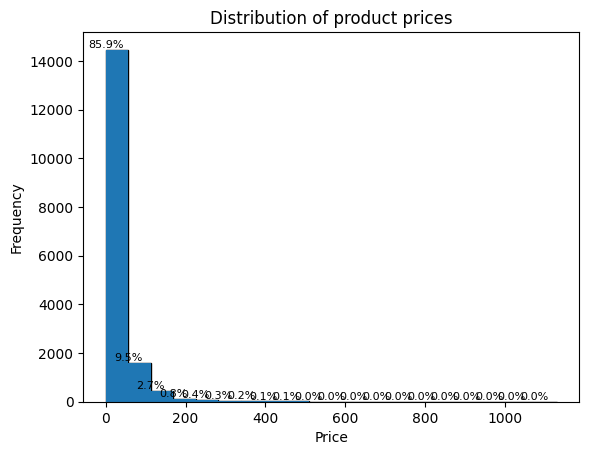

In [ ]:
# Graphing the product price distribution

prices = data_information['formatted_price']
# Create the histogram
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of product prices')

# Calculate percentage for each bin and display on histogram bars
bin_counts, bin_edges, _ = plt.hist(prices, bins=20)
total_count = len(prices)
for i in range(len(bin_counts)):
    percentage = (bin_counts[i] / total_count) * 100
    plt.text(bin_edges[i], bin_counts[i] + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


In [ ]:
# More information about price distribution

prices = pd.to_numeric(data_information['formatted_price'], errors='coerce')
# Calculate the minimum and maximum prices
min_price = prices.min()
max_price = prices.max()
print("Range of prices: ", min_price, "to", max_price)


Range of prices:  0.01 to 1129.99


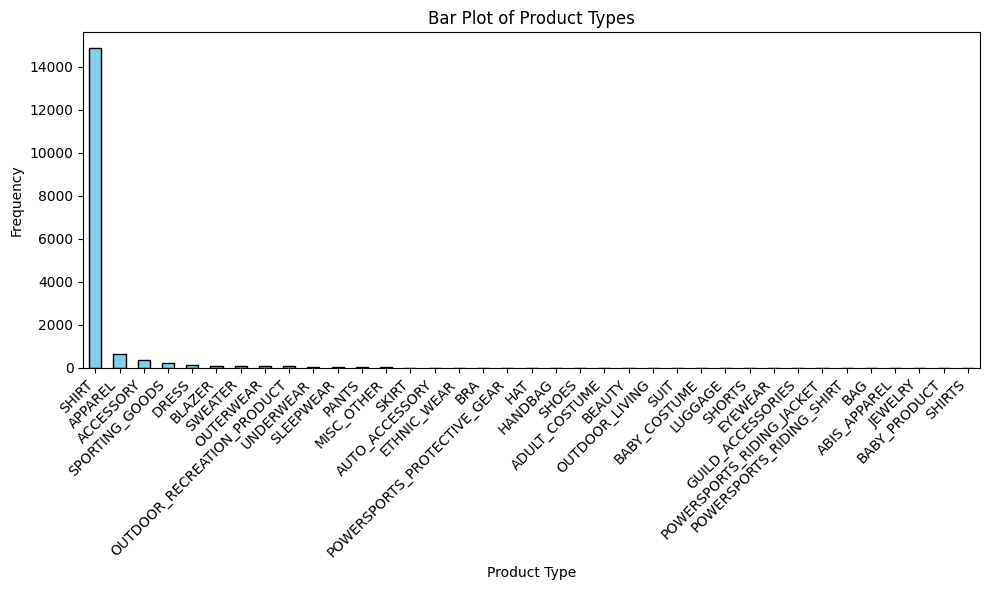

In [ ]:
# Graphing the product type distribution of the cleaned data

product_type_counts = data_information['product_type_name'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Product Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


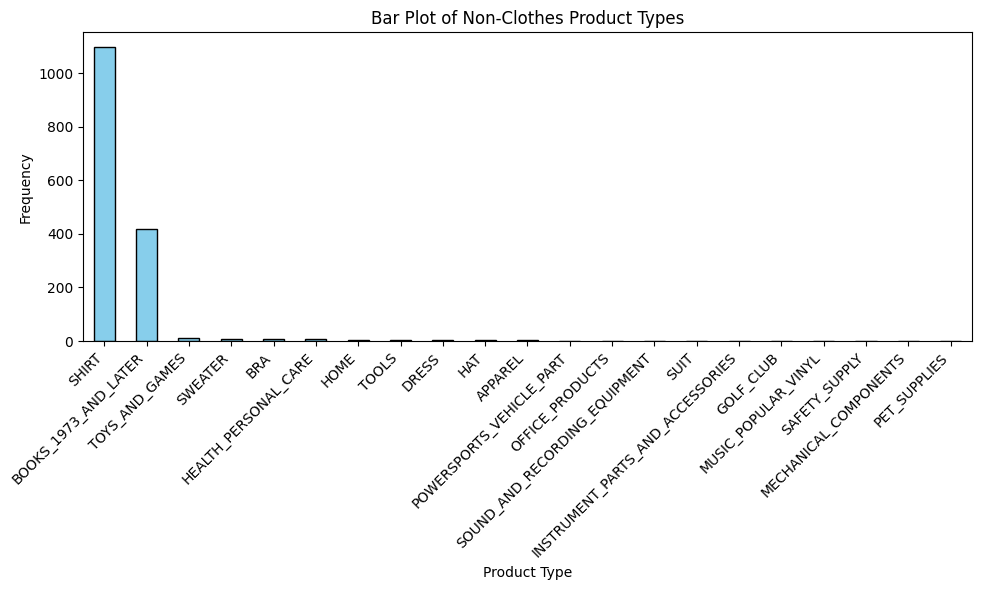

In [ ]:
# Graphing the product type distribution of the non-clothes product types

product_type_counts = non_clothes_types['product_type_name'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Non-Clothes Product Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

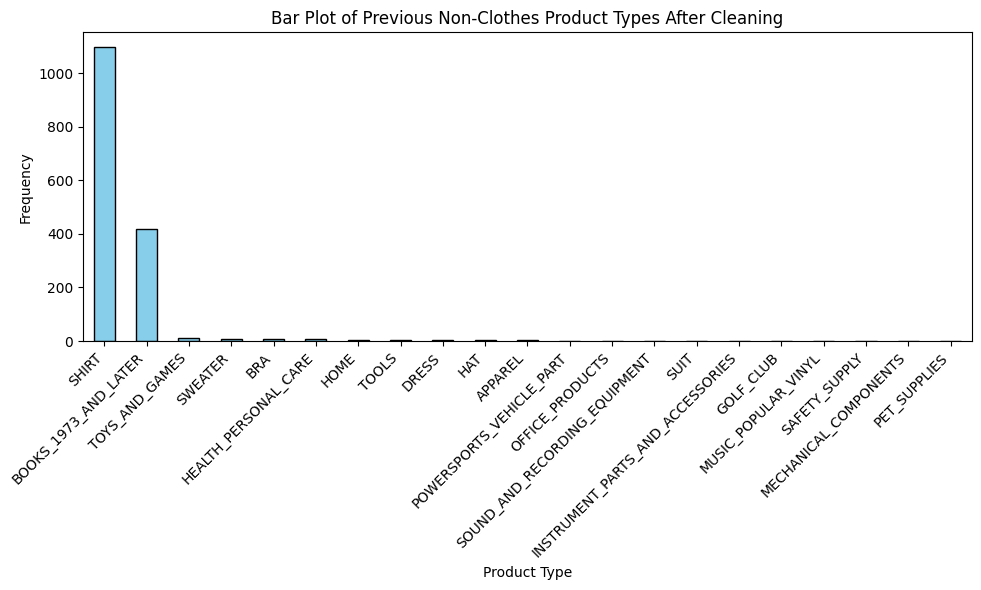

In [ ]:
# Graphing the product type distribution of the non-clothes product types after replacements are found

product_type_counts = non_clothes_types_fix['product_type_name'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Previous Non-Clothes Product Types After Cleaning')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Explore the occurences of brands

brand_counts = data_information['brand'].value_counts()

# Print the number of unique brands
print(len(brand_counts))

# Extract the top N most frequent brands
N = 10  # You can adjust this number based on your preference
top_N_brands = brand_counts.head(N)
top_N_brands

3479


brand
Anna-Kaci            117
Nanon                 91
DSQUARED2             87
Soprano               83
Mogul Interior        83
MKP Crop Top          82
BODEN                 78
H'nan                 77
Black Temptation      75
Head Case Designs     74
Name: count, dtype: int64



---



---


## **TF-IDF Vectorizer**

---



---



In [ ]:
# Prepare data for text models
text_modal_data=data_information.set_index('asin', inplace=False)
text_modal_data

,brand,color,medium_image_url,product_type_name,title,formatted_price
asin,,,,,,
B004GSI2OS,FeatherLite,ony black stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,26.26
B012YX2ZPI,HX-Kingdom Fashion T-shirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,9.99
B003BSRPB0,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,20.54
B014ICEJ1Q,FNC7C,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,7.39
B0079BMKDS,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,13.53
...,...,...,...,...,...,...
B01MRV2IFS,YueLian,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,YueLian Women's Chiffon Short Sleeves Sun Prot...,19.25
B01LY4QWLF,Vintage America,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Vintage America Women's Large Lace Up Collared...,23.24
B07167SCNH,Tart Collections,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"Tart Womens Collections Ann Wrap Top, Xs, Black",29.99


In [ ]:
# Classify weights per category
weight_title = 0.3
weight_type = 0.2
weight_brand = 0.2
weight_color = 0.2
weight_price = 0.1

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

price_scaled = scaler.fit_transform(text_modal_data['formatted_price'].values.reshape(-1, 1))
price_similarity = (1 - np.abs(price_scaled - price_scaled.T))

# Initialize vectorizers for each feature
tf_title = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), stop_words='english')
tf_type = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), stop_words='english')
tf_brand = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), stop_words='english', token_pattern=r'(?u)\b\w+\b')
tf_color = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english')

# Fit and transform each feature
tfidf_title = tf_title.fit_transform(text_modal_data['title'])
tfidf_type = tf_type.fit_transform(text_modal_data['product_type_name'])
tfidf_brand = tf_brand.fit_transform(text_modal_data['brand'])
tfidf_color = tf_color.fit_transform(text_modal_data['color'])

# Calculate cosine similarity
cos_sim_title = cosine_similarity(tfidf_title, tfidf_title)
cos_sim_type = cosine_similarity(tfidf_type, tfidf_type)
cos_sim_brand = cosine_similarity(tfidf_brand, tfidf_brand)
cos_sim_color = cosine_similarity(tfidf_color, tfidf_color)

In [ ]:
# Configure cosine similarity with weights
cos_sim_title_combined = (weight_title * cos_sim_title)
cos_sim_brand_combined = (weight_brand * cos_sim_brand)
cos_sim_type_combined = (weight_type * cos_sim_type)
cos_sim_color_combined = (weight_color * cos_sim_color)
cos_sim_price_combined = (weight_price * price_similarity)

cos_sim_combined = (cos_sim_title_combined + cos_sim_color_combined + cos_sim_price_combined + cos_sim_brand_combined + cos_sim_type_combined)

In [ ]:
# Fetch product ids
productID = pd.Series(text_modal_data.index)

# TF Model recommendations function
def recommendations(asin, cos_sim=cos_sim_combined):
    # Initialize variables
    recommendations_10 = []
    scores_10 = []

    # Try find recommendations, error if product does not exist
    try:
        idx = productID[productID == asin].index[0]
        score_series = pd.Series(cos_sim[idx]).sort_values(ascending=False)
        top_10 = score_series.iloc[1:11].index  # Exclude the item itself
        recommendations_10 = [text_modal_data.iloc[i] for i in top_10]
        scores_10 = score_series.iloc[1:11].values

    except IndexError:
        recommendations_10 = ["Could not find product"]
        scored_10 = ["Could not find product"]

    return recommendations_10, scores_10

In [ ]:
# Function to create clusters out of cosine similarity

def cluster_data(cos_sim_matrix, n_clusters=10):
    # Applying KMeans clustering on the cosine similarity matrix
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(cos_sim_matrix)
    return labels

# Clustering for each category
labels_titles = cluster_data(cos_sim_title)
labels_brands = cluster_data(cos_sim_brand)
labels_type = cluster_data(cos_sim_type)
labels_color = cluster_data(cos_sim_color)
labels_combined = cluster_data(cos_sim_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

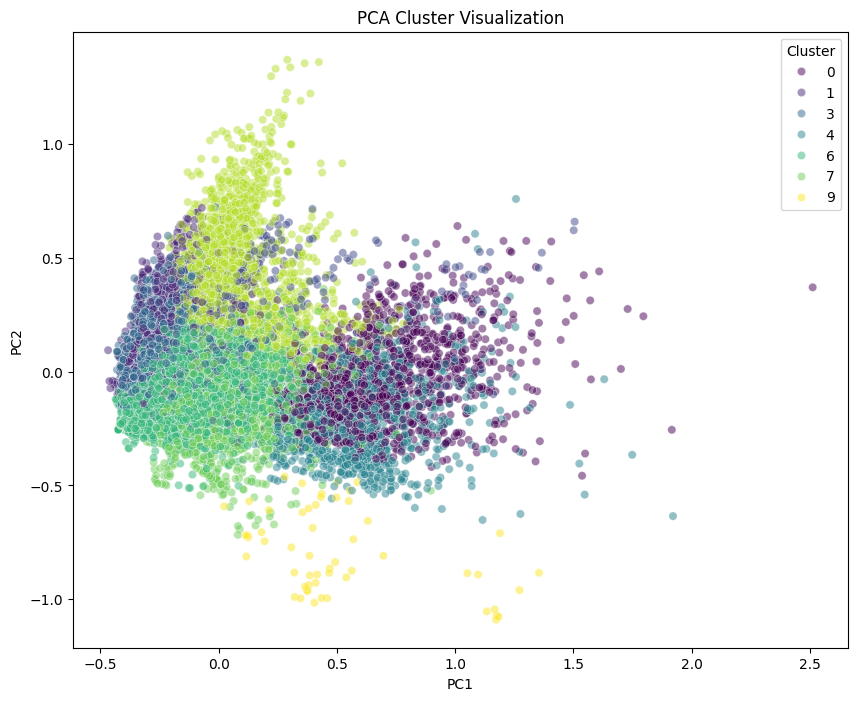

In [ ]:
# Function to visualize the clusters

def visualize_clusters_pca(cos_sim_matrix, labels, n_components=2):
    # Reduce dimensions
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(cos_sim_matrix)

    # Create a DataFrame for easier plotting
    import pandas as pd
    plot_data = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
    plot_data['Cluster'] = labels

    # Scatter plot of the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=plot_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.5)
    plt.title('PCA Cluster Visualization')
    plt.show()

# Visualize the clusters
visualize_clusters_pca(cos_sim_title, labels_titles)


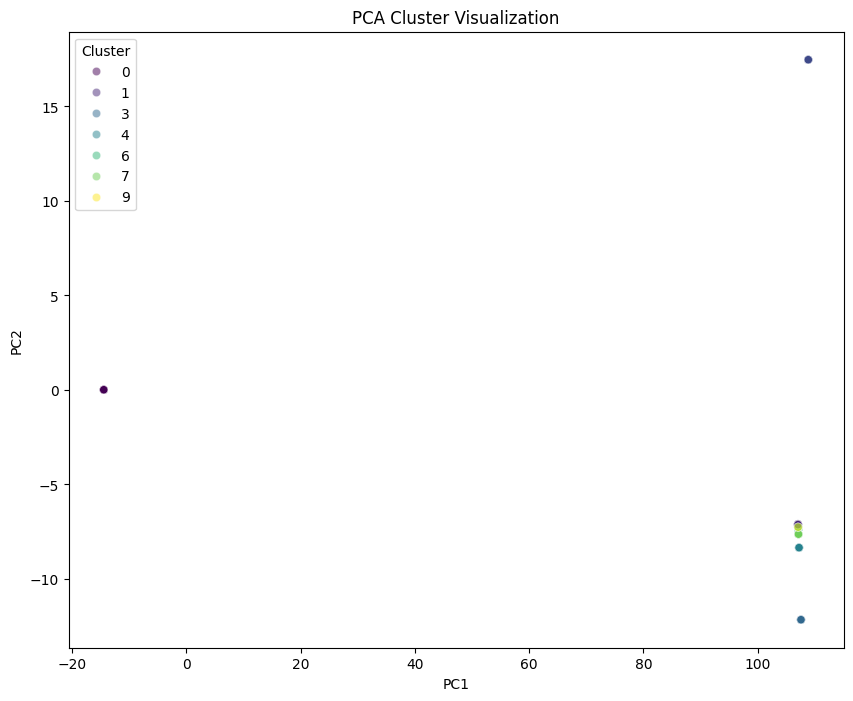

In [ ]:
visualize_clusters_pca(cos_sim_type, labels_type)

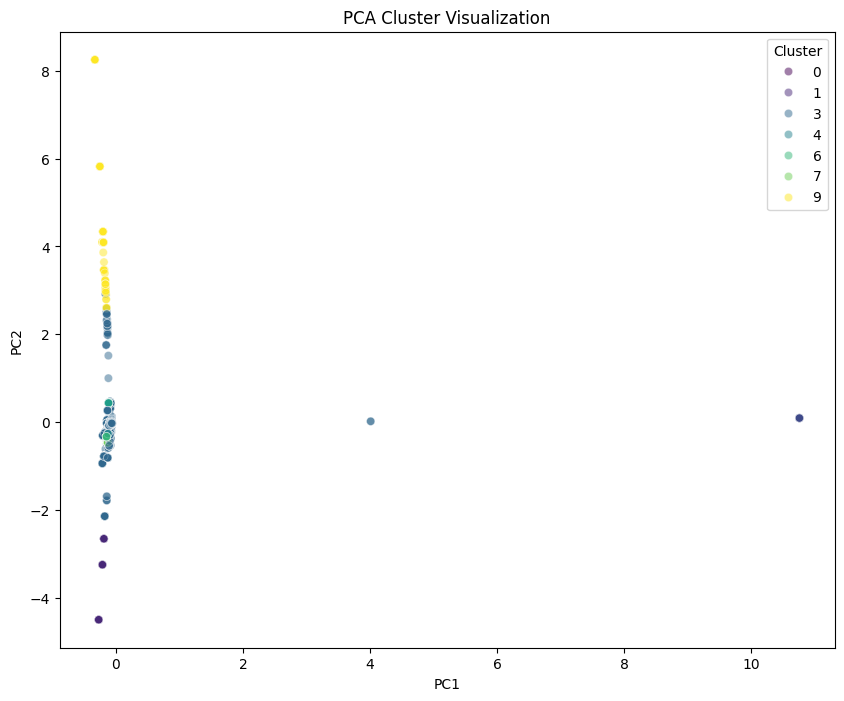

In [ ]:
visualize_clusters_pca(cos_sim_brand, labels_brands)

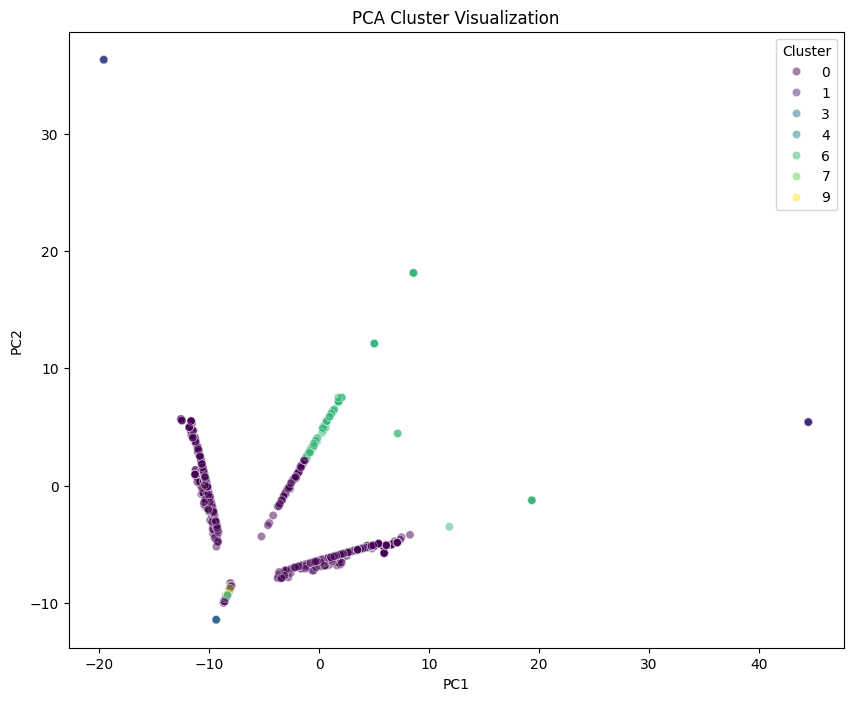

In [ ]:
visualize_clusters_pca(cos_sim_color, labels_color)

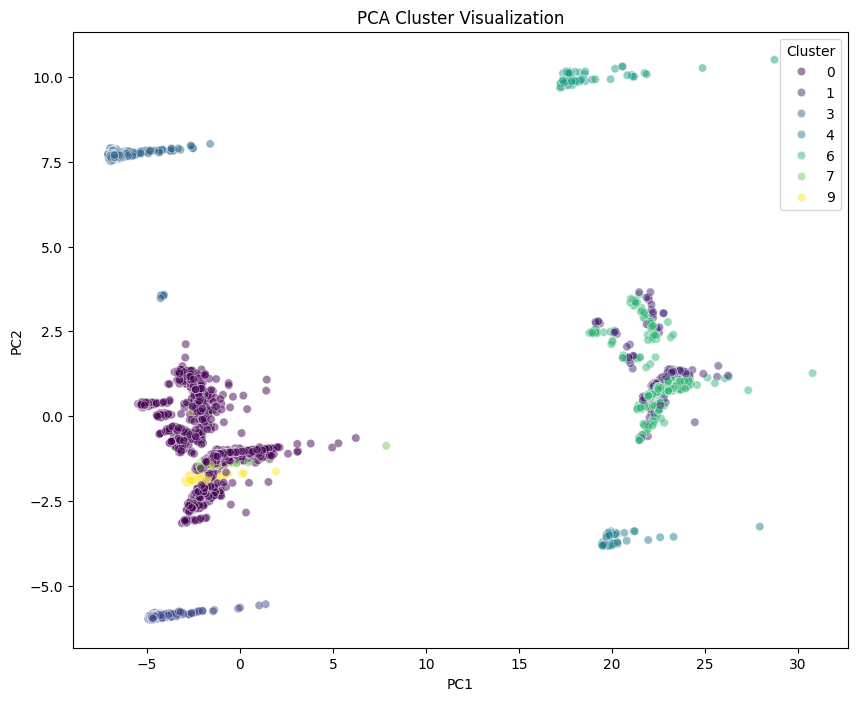

In [ ]:
visualize_clusters_pca(cos_sim_combined, labels_combined)

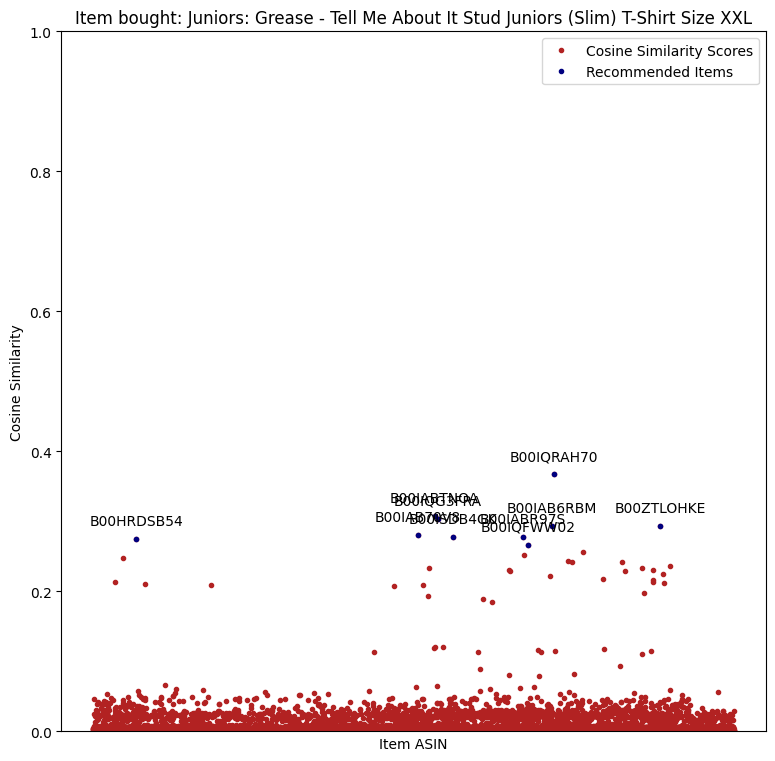

In [ ]:
# Plot cosine similarity
cos_sim_title_data = pd.DataFrame(cos_sim_title, index=text_modal_data.index, columns=text_modal_data.index)

plt.figure(figsize=(20, 20))

# Loop to generate plots; only one subplot for demonstration, adjust 'range(1, 2)' for more plots
for q in range(1, 2):
    plt.subplot(2, 2, q)
    index = np.random.choice(text_modal_data.index)  # Random ASIN from the index

    # Drop the column corresponding to the selected ASIN to avoid self-comparison
    to_plot_data = cos_sim_title_data.drop(index, axis=1)

    # Plot the cosine similarities for the selected ASIN
    plt.plot(to_plot_data.loc[index], '.', color='firebrick', label='Cosine Similarity Scores')

    # Get recommendations based on cosine similarity
    index_recomm, scores_recomm = recommendations(index, cos_sim_title)  # Ensure this function returns ASINs for annotation

    recomm_asins = [row.name for row in index_recomm]

    # Plot recommendations
    plt.plot(recomm_asins, scores_recomm, '.', color='navy', label='Recommended Items')

    # Title using the title from the text_modal_data
    plt.title('Item bought: ' + text_modal_data.loc[index, 'title'])
    plt.xlabel('Item ASIN')

    # Annotate the recommended items
    for rec_asin, score in zip(recomm_asins, scores_recomm):
        plt.annotate(rec_asin, (rec_asin, score), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    plt.ylabel('Cosine Similarity')
    plt.ylim(0, 1)
    plt.legend()

    plt.xticks([])

plt.show()

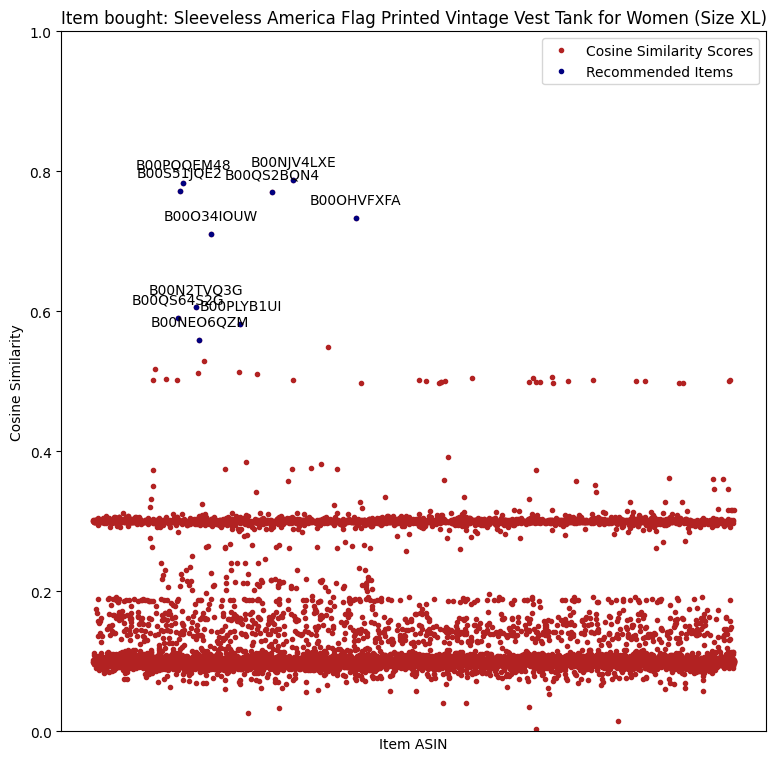

In [ ]:
# Plot cosine similarity
cos_sim_combined_data = pd.DataFrame(cos_sim_combined, index=text_modal_data.index, columns=text_modal_data.index)

plt.figure(figsize=(20, 20))

# Loop to generate plots; only one subplot for demonstration, adjust 'range(1, 2)' for more plots
for q in range(1, 2):
    plt.subplot(2, 2, q)
    index = np.random.choice(text_modal_data.index)  # Random ASIN from the index

    # Drop the column corresponding to the selected ASIN to avoid self-comparison
    to_plot_data = cos_sim_combined_data.drop(index, axis=1)

    # Plot the cosine similarities for the selected ASIN
    plt.plot(to_plot_data.loc[index], '.', color='firebrick', label='Cosine Similarity Scores')

    # Get recommendations based on cosine similarity
    index_recomm, scores_recomm = recommendations(index, cos_sim_combined)  # Ensure this function returns ASINs for annotation

    recomm_asins = [row.name for row in index_recomm]

    # Plot recommendations
    plt.plot(recomm_asins, scores_recomm, '.', color='navy', label='Recommended Items')

    # Title using the title from the text_modal_data
    plt.title('Item bought: ' + text_modal_data.loc[index, 'title'])
    plt.xlabel('Item ASIN')

    # Annotate the recommended items
    for rec_asin, score in zip(recomm_asins, scores_recomm):
        plt.annotate(rec_asin, (rec_asin, score), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    plt.ylabel('Cosine Similarity')
    plt.ylim(0, 1)
    plt.legend()

    plt.xticks([])
  # Adjust the layout to make room for the subplot titles

plt.show()



---



---


## **BERT**

---



---



In [ ]:
!pip install -U sentence-transformers
import sentence_transformers

!pip install huggingface_hub
!python -c "from huggingface_hub.hf_api import HfFolder; HfFolder.save_token('MY_HUGGINGFACE_TOKEN_HERE')"

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

title_embeddings = model.encode(text_modal_data['title'], show_progress_bar=True)
color_embeddings = model.encode(text_modal_data['color'], show_progress_bar=True)
brand_embeddings = model.encode(text_modal_data['brand'], show_progress_bar=True)
type_embeddings = model.encode(text_modal_data['product_type_name'], show_progress_bar=True)
price_embeddings = model.encode(text_modal_data['formatted_price'].apply(lambda x: f"Price: ${x}"), show_progress_bar=True)

combined_embeddings = (weight_title * title_embeddings +
                       weight_color * color_embeddings +
                       weight_brand * brand_embeddings +
                       weight_type * type_embeddings +
                       weight_price * price_embeddings)

Batches:   0%|          | 0/527 [00:00<?, ?it/s]

Batches:   0%|          | 0/527 [00:00<?, ?it/s]

Batches:   0%|          | 0/527 [00:00<?, ?it/s]

Batches:   0%|          | 0/527 [00:00<?, ?it/s]

Batches:   0%|          | 0/527 [00:00<?, ?it/s]

In [ ]:
X = np.array(title_embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-2.472231,-0.971555,2.028504,0.296733,-0.686662
1,4.601420,-5.280865,-0.742551,-3.367326,-2.508978
2,-3.354976,-0.377980,-3.872742,-1.818474,1.894566
3,2.219143,-2.284657,3.076908,0.813116,-1.663023
4,-3.136477,0.066925,-4.942914,-4.342654,1.128062


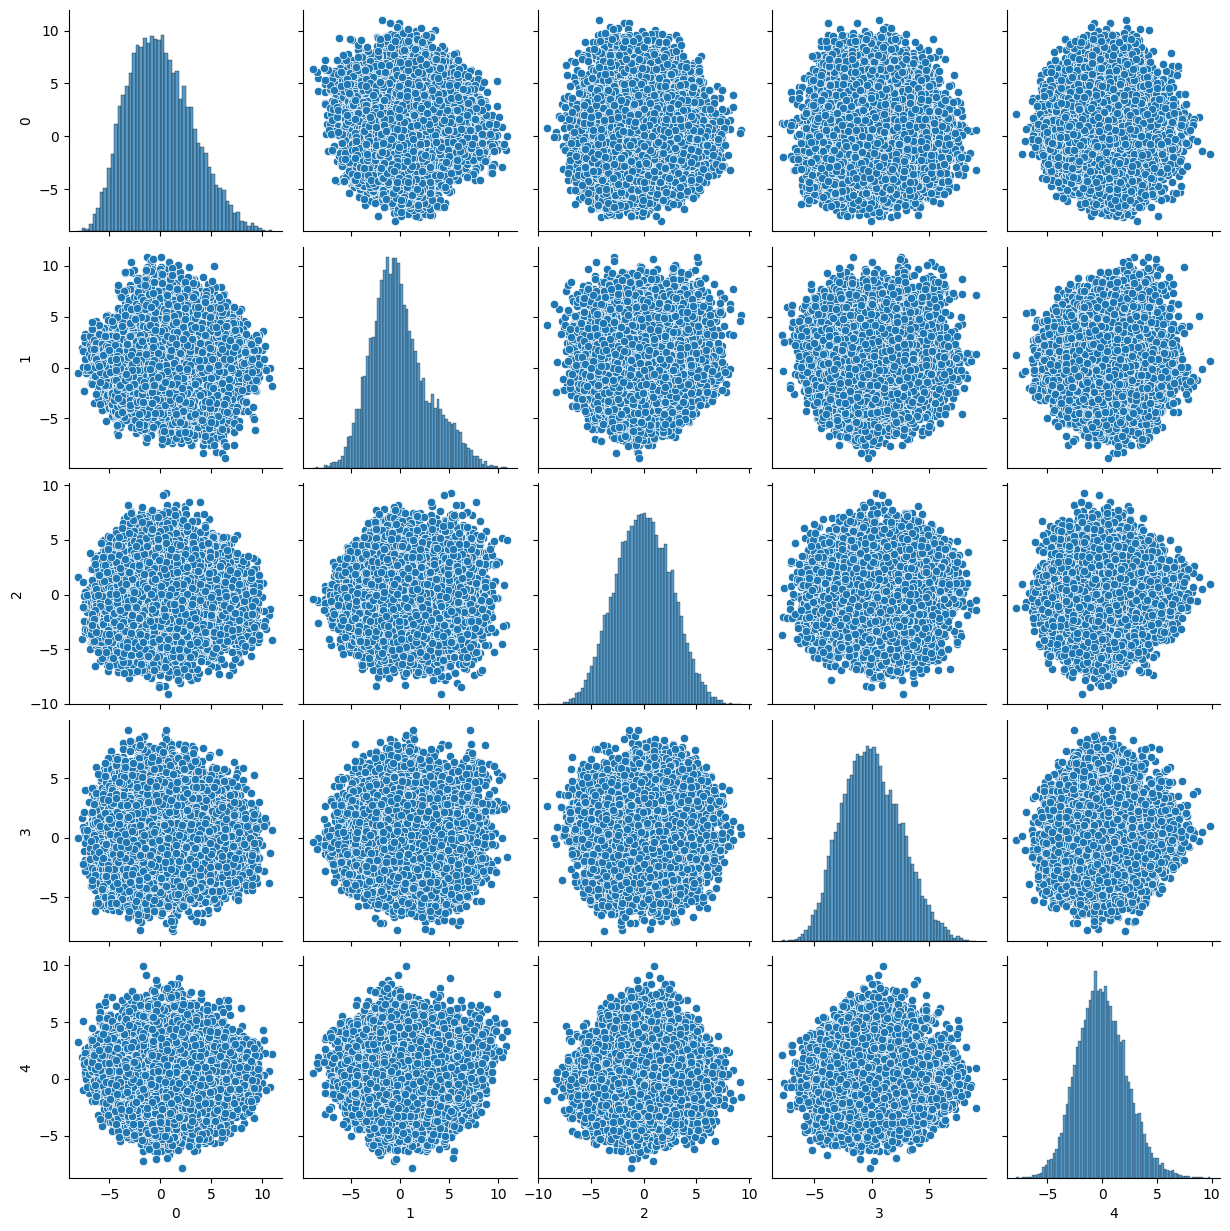

In [ ]:
sns.pairplot(pca_data)

In [ ]:
cos_sim_data = pd.DataFrame(cosine_similarity(X), index=text_modal_data.index, columns=text_modal_data.index)

X_combined = np.array(combined_embeddings)
cos_sim_data_combined = pd.DataFrame(cosine_similarity(X_combined), index=text_modal_data.index, columns=text_modal_data.index)

def give_recommendations(index, data, print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm = data.loc[index].sort_values(ascending=False).index.tolist()[1:11]
  scores_recomm = data.loc[index].sort_values(ascending=False).tolist()[1:11]

  if print_recommendation:
      # Correctly access the bought item using the ASIN index
      bought_item_title = text_modal_data.loc[index, 'title']
      print('The bought item is this one: %s \n' % bought_item_title)

      k = 1
      for recommended_asin in index_recomm:
          # Fetch the title for each recommended ASIN
          recommended_title = text_modal_data.loc[recommended_asin, 'title']
          print('The number %i recommended item is this one: %s \n' % (k, recommended_title))
          k += 1

  return index_recomm, scores_recomm

print(give_recommendations("B010VPVJIU", data = cos_sim_data, print_recommendation=True))

The bought item is this one: Bky Lace Summer White Patchwork Blouse Bky12-store1-009-1 

The number 1 recommended item is this one: Summer Casual Floral Cotton Short Sleeve T Shirt Bky12-store3-019 

The number 2 recommended item is this one: Anna Kaci S/M Fit Classic White Peplum Flare Sphagetti Strap Lace Overlay Blouse 

The number 3 recommended item is this one: Bky Lace Patchwork Sexy Blac Blouse Long Sleeve Bky12-store1-002 

The number 4 recommended item is this one: Summer Floral Lace Loose T-shirts Plus Size Bky12-store2-022 

The number 5 recommended item is this one: On Twelfth Women's Medium Studded Scoop-Neck Blouse White M 

The number 6 recommended item is this one: Marina Rinaldi Women's Valletto Floral Printed T-Shirt Medium White 

The number 7 recommended item is this one: autumn pullover coat blouse dress white- BKY13-019.3 

The number 8 recommended item is this one: Marina Rinaldi Women's Figurare Floral Sheer Blouse 12W / 21 White 

The number 9 recommended item 

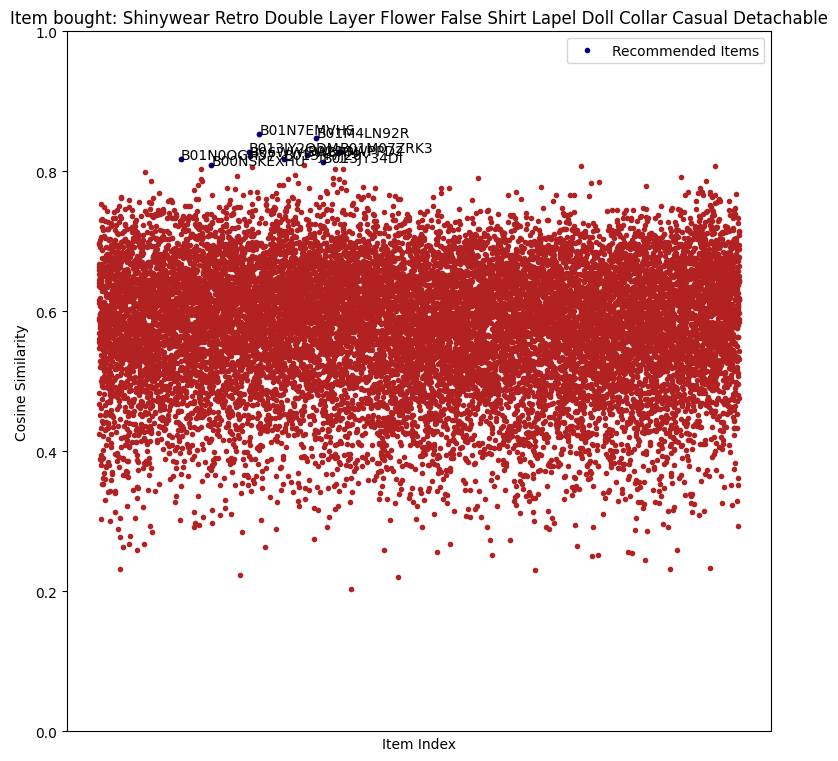

In [ ]:
plt.figure(figsize=(20, 20))

for q in range(1, 2):
    plt.subplot(2, 2, q)
    index = np.random.choice(text_modal_data.index)  # Random ASIN from the index
    to_plot_data = cos_sim_data.drop(index, axis=1)  # Drop the column corresponding to that ASIN
    plt.plot(to_plot_data.loc[index], '.', color='firebrick')  # Plot the cosine similarities

    index_recomm, scores_recomm = give_recommendations(index, cos_sim_data)  # Get recommendations

    plt.plot(index_recomm, scores_recomm, '.', color='navy', label='Recommended Items')  # Plot recommendations
    plt.title('Item bought: ' + text_modal_data.loc[index, 'title'])  # Use the title from the text_modal_data
    plt.xlabel('Item Index')

    # Annotate the recommended items
    for rec_asin, score in zip(index_recomm, scores_recomm):
        plt.annotate(rec_asin, (rec_asin, score), fontsize=10)

    plt.ylabel('Cosine Similarity')
    plt.ylim(0, 1)
    plt.legend()

    plt.xticks([])

plt.show()

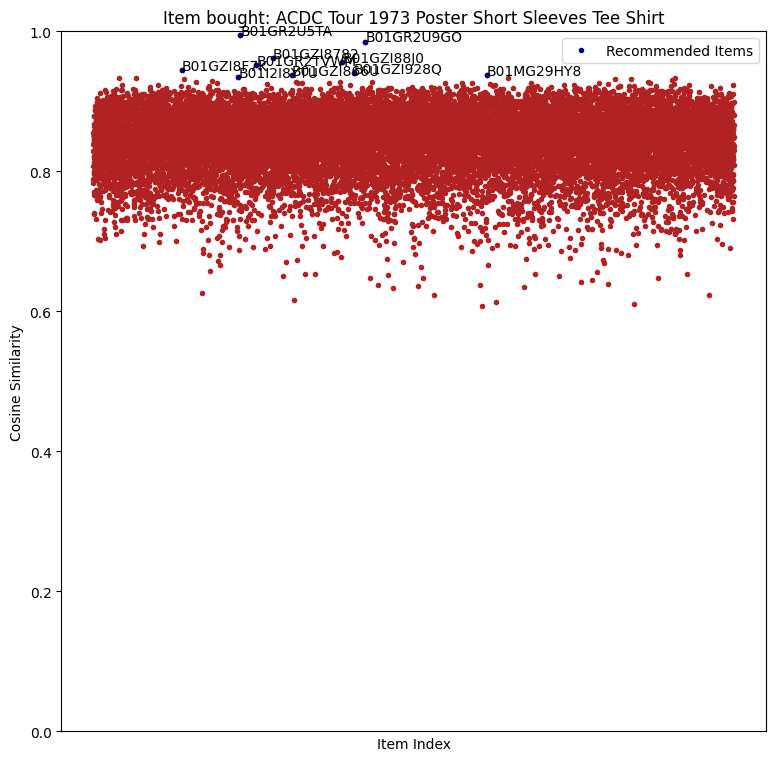

In [ ]:
plt.figure(figsize=(20, 20))

for q in range(1, 2):
    plt.subplot(2, 2, q)
    index = np.random.choice(text_modal_data.index)  # Random ASIN from the index
    to_plot_data = cos_sim_data_combined.drop(index, axis=1)  # Drop the column corresponding to that ASIN
    plt.plot(to_plot_data.loc[index], '.', color='firebrick')  # Plot the cosine similarities

    index_recomm, scores_recomm = give_recommendations(index, cos_sim_data_combined)  # Get recommendations

    plt.plot(index_recomm, scores_recomm, '.', color='navy', label='Recommended Items')  # Plot recommendations
    plt.title('Item bought: ' + text_modal_data.loc[index, 'title'])  # Use the title from the text_modal_data
    plt.xlabel('Item Index')

    # Annotate the recommended items
    for rec_asin, score in zip(index_recomm, scores_recomm):
        plt.annotate(rec_asin, (rec_asin, score), fontsize=10)

    plt.ylabel('Cosine Similarity')
    plt.ylim(0, 1)
    plt.legend()

    plt.xticks([])

plt.show()



---



---


## **VGG**

---



---



In [ ]:
img_dataset = data_information

In [ ]:
# Fit the model

# Function to preprocess an image for VGG16 model
def preprocess_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img = img.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract features from an image using VGG16 model
def extract_features(img_array, model):
    features = model.predict(img_array)
    return features.flatten()

# Function to load image URLs from the dataset
def load_image_urls(dataset):
    image_urls = dataset['medium_image_url']
    return image_urls

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load image URLs from the dataset
image_urls = load_image_urls(img_dataset)

# Preprocess images, and extract features
features_list = []
for image_url in image_urls:
    img_array = preprocess_image_from_url(image_url)
    features = extract_features(img_array, vgg_model)
    features_list.append(features)
features_array = np.array(features_list)

# Build nearest neighbors model
nn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
nn_model.fit(features_array)

# Save the features array and the nearest neighbors model for future use
np.save('features.npy', features_array)
joblib.dump(nn_model, 'nn_model.pkl')

print("Model is ready for making product recommendations based on image similarity.")

1/1 [==============================] - 0s 21ms/step


KeyboardInterrupt: 

In [ ]:
# Fetch model from our drive so you don't need to fit model everytime
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace 'path_to_your_files' with the actual path in your Google Drive
features_array = np.load('/content/drive/My Drive/features.npy')
nn_model = joblib.load('/content/drive/My Drive/nn_model.pkl')

In [ ]:
# Function to preprocess an image for VGG16 model
def preprocess_image_from_path(image_path):
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img = img.resize((224, 224))  # Match the size used during model training
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [ ]:
# Find nearest neighbors for a new image

from PIL import Image

def find_nearest_neighbors(new_image_path, nn_model, features_array):
    # Preprocess the image
    img_array = preprocess_image_from_path(new_image_path)

    # Assuming you have a feature extraction function similar to what you used before
    new_features = extract_features(img_array, vgg_model)  # Use the VGG model you loaded or defined earlier

    # Use the nearest neighbors model to find the most similar images
    nn_model = NearestNeighbors(n_neighbors=11, metric='cosine')
    nn_model.fit(features_array)
    distances, indices = nn_model.kneighbors([new_features])

    cosine_similarities = 1 - distances

    # Return the nearest neighbors
    return cosine_similarities, indices

# Example usage
new_image_path = img_dataset['medium_image_url'][1500]
neighbors_cos, neighbors_indices = find_nearest_neighbors(new_image_path, nn_model, features_array)
print(neighbors_indices)
print("Asin of nearest neighbors:", img_dataset.iloc[neighbors_indices[0][1:]].index.tolist())
print("Cosine Similarities of nearest neighbors:", neighbors_cos[0][1:])

# Assuming 'image_urls' is a list of URLs corresponding to the indices in your features_array
nearest_neighbor_urls = [img_dataset['medium_image_url'][i] for i in neighbors_indices[0]]  # Replace these indices with those from your result


1/1 [==============================] - 0s 23ms/step
[[ 1500  7738  9201 14016  5231 14638  4846  8381  9454 11222  7085]]
Asin of nearest neighbors: [7738, 9201, 14016, 5231, 14638, 4846, 8381, 9454, 11222, 7085]
Cosine Similarities of nearest neighbors: [0.57426673 0.5720155  0.5638918  0.55398244 0.55067974 0.54984355
 0.54368836 0.54270965 0.5414185  0.5393411 ]


In [ ]:
from IPython.display import display, Image  # Ensure this is the only Image import

# Display each image URL using IPython.display
for url in nearest_neighbor_urls:
    display(Image(url=url))


1/1 [==============================] - 0s 24ms/step


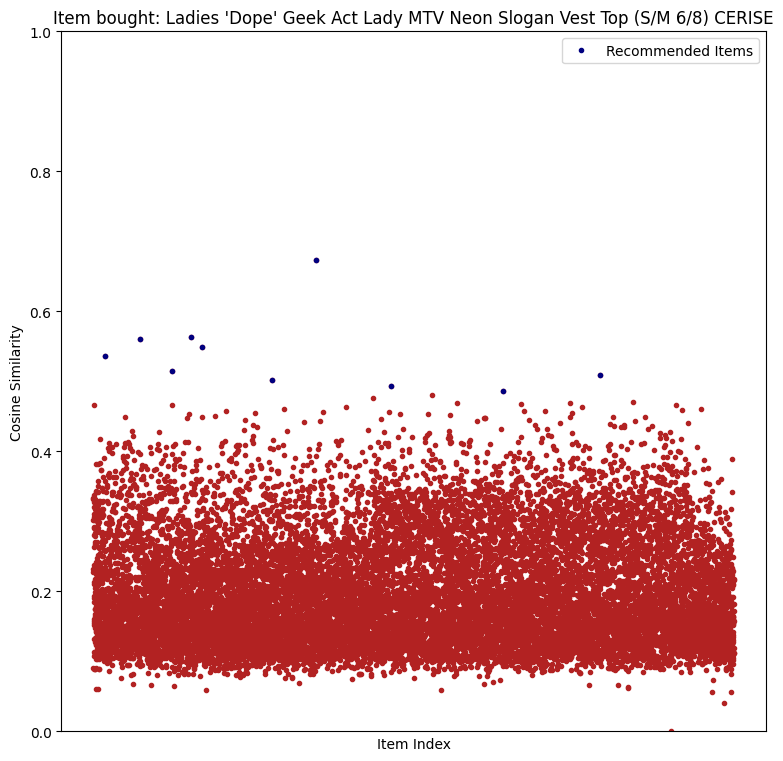

In [ ]:
from PIL import Image

# Compute cosine similarity matrix
cos_sim_data_combined = cosine_similarity(features_array)

plt.figure(figsize=(20, 20))

for q in range(1, 2):
    plt.subplot(2, 2, q)
    index = np.random.choice(len(img_dataset))  # Random index from the features
    to_plot_data = cos_sim_data_combined[index]  # Use index to access similarities
    np.fill_diagonal(cos_sim_data_combined, 0)
    plt.plot(to_plot_data, '.', color='firebrick')  # Plot the cosine similarities

    scores_recomm, index_recomm = find_nearest_neighbors(img_dataset['medium_image_url'][index], img_dataset, features_array)  # Get recommendations

    plt.plot(index_recomm[0][1:], scores_recomm[0][1:], '.', color='navy', label='Recommended Items')
    plt.title('Item bought: ' + img_dataset.loc[index, 'title'])
    plt.xlabel('Item Index')

    plt.ylabel('Cosine Similarity')
    plt.ylim(0, 1)
    plt.legend()
    plt.xticks([])

plt.show()





---



---


## **Comparison**

---



---



In [ ]:
def jaccard_similarity(set1, set2):
    """Calculate the Jaccard Similarity between two sets."""
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    if not union:
        return 0
    return len(intersection) / len(union)

In [ ]:
from PIL import Image

random_productIDs = productID.sample(100, random_state=1)

similarity_tf_title_combined = 0
similarity_tf_title_bert_title = 0
similarity_tf_title_bert_combined = 0
similarity_tf_combined_bert_tile = 0
similarity_tf_combined_bert_combined = 0
similarity_bert_tile_bert_combined = 0
similarity_tf_title_image = 0
similarity_tf_combined_image = 0
similarity_bert_title_image = 0
similarity_bert_combined_image = 0

jaccard_similarities = {
    'tf_title_combined': [],
    'tf_title_bert_title': [],
    'tf_title_bert_combined': [],
    'tf_combined_bert_title': [],
    'tf_combined_bert_combined': [],
    'bert_title_bert_combined': [],
    'similarity_tf_title_image': [],
    'similarity_tf_combined_image': [],
    'similarity_bert_title_image': [],
    'similarity_bert_combined_image': []
}

ts_tf_title = [0,0,0,0,0,0,0,0,0,0]
ts_tf_title_combined = [0,0,0,0,0,0,0,0,0,0]
ts_tf_bert = [0,0,0,0,0,0,0,0,0,0]
ts_tf_bert_combined = [0,0,0,0,0,0,0,0,0,0]
ts_img = [0,0,0,0,0,0,0,0,0,0]

for id in random_productIDs:
    combined_recommendations, combined_scores = recommendations(id, cos_sim_combined)
    title_recommendations, title_scores = recommendations(id, cos_sim_title)
    bert_recommendations, bert_scores = give_recommendations(index=id, data = cos_sim_data)
    bert_combined_recommendations, bert_combined_scores = give_recommendations(index=id, data = cos_sim_data_combined)

    new_image_path = text_modal_data['medium_image_url'][id]
    img_recommendations_scores, img_recommendation_indices = find_nearest_neighbors(new_image_path, nn_model, features_array)
    img_recommendations = img_dataset['asin'].iloc[img_recommendation_indices[0][1:]].tolist()

    # SIMILARITY

    # Convert recommendation lists to sets of ASINs to find common elements
    combined_set = set([item.name for item in combined_recommendations])
    title_set = set([item.name for item in title_recommendations])
    bert_combined_set = set(bert_combined_recommendations)
    bert_set = set(bert_recommendations)
    img_set = set(img_recommendations)

    # Increment same_guess by the number of common elements
    similarity_tf_title_combined += len(combined_set & title_set)  # Intersection of sets
    similarity_tf_title_bert_title += len(bert_set & title_set)  # Intersection of sets
    similarity_tf_title_bert_combined += len(bert_combined_set & title_set)  # Intersection of sets
    similarity_tf_combined_bert_tile += len(combined_set & bert_set)  # Intersection of sets
    similarity_tf_combined_bert_combined += len(combined_set & bert_combined_set)  # Intersection of sets
    similarity_bert_tile_bert_combined += len(bert_combined_set & bert_set)  # Intersection of sets
    similarity_tf_title_image += len(img_set & title_set)
    similarity_tf_combined_image += len(img_set & combined_set)
    similarity_bert_title_image += len(img_set & bert_set)
    similarity_bert_combined_image += len(img_set & bert_combined_set)

    jaccard_similarities['tf_title_combined'].append(jaccard_similarity(combined_set, title_set))
    jaccard_similarities['tf_title_bert_title'].append(jaccard_similarity(bert_set, title_set))
    jaccard_similarities['tf_title_bert_combined'].append(jaccard_similarity(bert_combined_set, title_set))
    jaccard_similarities['tf_combined_bert_title'].append(jaccard_similarity(combined_set, bert_set))
    jaccard_similarities['tf_combined_bert_combined'].append(jaccard_similarity(combined_set, bert_combined_set))
    jaccard_similarities['bert_title_bert_combined'].append(jaccard_similarity(bert_combined_set, bert_set))
    jaccard_similarities['similarity_tf_title_image'].append(jaccard_similarity(img_set, title_set))
    jaccard_similarities['similarity_tf_combined_image'].append(jaccard_similarity(img_set, combined_set))
    jaccard_similarities['similarity_bert_title_image'].append(jaccard_similarity(img_set, bert_set))
    jaccard_similarities['similarity_bert_combined_image'].append(jaccard_similarity(img_set, bert_combined_set))

    # SCORES

    ts_tf_title = [x + y for x, y in zip(ts_tf_title, title_scores)]
    ts_tf_title_combined = [x + y for x, y in zip(ts_tf_title_combined, combined_scores)]
    ts_tf_bert = [x + y for x, y in zip(ts_tf_bert, bert_scores)]
    ts_tf_bert_combined = [x + y for x, y in zip(ts_tf_bert_combined, bert_combined_scores)]
    ts_img = [x + y for x, y in zip(ts_tf_bert_combined, img_recommendations_scores[0][1:])]


print(similarity_tf_title_combined/1000)
print(similarity_tf_title_bert_title/1000)
print(similarity_tf_title_bert_combined/1000)
print(similarity_tf_combined_bert_tile/1000)
print(similarity_tf_combined_bert_combined/1000)
print(similarity_bert_tile_bert_combined/1000)
print(similarity_tf_title_image/1000)
print(similarity_tf_combined_image/1000)
print(similarity_bert_title_image/1000)
print(similarity_bert_combined_image/1000)

sample_num = [100,100,100,100,100,100,100,100,100,100];
averages_sim_title = [x / y for x, y in zip(ts_tf_title, sample_num)]
averages_sim_combined = [x / y for x, y in zip(ts_tf_title_combined, sample_num)]
averages_sim_bert = [x / y for x, y in zip(ts_tf_title, sample_num)]
averages_sim_bert_combined = [x / y for x, y in zip(ts_tf_title_combined, sample_num)]
averages_sim_vgg = [x / y for x, y in zip(ts_img, sample_num)]

for key, values in jaccard_similarities.items():
    average_jaccard = sum(values) / len(values)
    print(f"Average Jaccard similarity for {key}: {average_jaccard:.3f}")

1/1 [==============================] - 0s 22ms/step
0.442
0.169
0.214
0.163
0.322
0.235
0.001
0.0
0.001
0.002
Average Jaccard similarity for tf_title_combined: 0.340
Average Jaccard similarity for tf_title_bert_title: 0.107
Average Jaccard similarity for tf_title_bert_combined: 0.140
Average Jaccard similarity for tf_combined_bert_title: 0.103
Average Jaccard similarity for tf_combined_bert_combined: 0.227
Average Jaccard similarity for bert_title_bert_combined: 0.147
Average Jaccard similarity for similarity_tf_title_image: 0.001
Average Jaccard similarity for similarity_tf_combined_image: 0.000
Average Jaccard similarity for similarity_bert_title_image: 0.001
Average Jaccard similarity for similarity_bert_combined_image: 0.001


In [ ]:
print(averages_sim_title)
print(averages_sim_combined)
print(averages_sim_bert)
print(averages_sim_bert_combined)
print(averages_sim_vgg)

[0.3637546302789832, 0.27506078268408213, 0.23692048603659643, 0.21067984289700079, 0.1953918298195562, 0.17539917262204188, 0.16360815272495124, 0.15472764682362783, 0.1502295102201953, 0.14215918469826494]
[0.6880897782177903, 0.6403212345366244, 0.609362987099516, 0.591304028940526, 0.5782423345707326, 0.567580533352708, 0.5609434738361054, 0.55019138739626, 0.5439946638565512, 0.5397623067374017]
[0.3637546302789832, 0.27506078268408213, 0.23692048603659643, 0.21067984289700079, 0.1953918298195562, 0.17539917262204188, 0.16360815272495124, 0.15472764682362783, 0.1502295102201953, 0.14215918469826494]
[0.6880897782177903, 0.6403212345366244, 0.609362987099516, 0.591304028940526, 0.5782423345707326, 0.567580533352708, 0.5609434738361054, 0.55019138739626, 0.5439946638565512, 0.5397623067374017]
[0.9677954769134521, 0.957812421321869, 0.9532142865657807, 0.9496684873104095, 0.9475737041234971, 0.9453482562303543, 0.9440761119127273, 0.9427983170747757, 0.9414262694120407, 0.9402116686

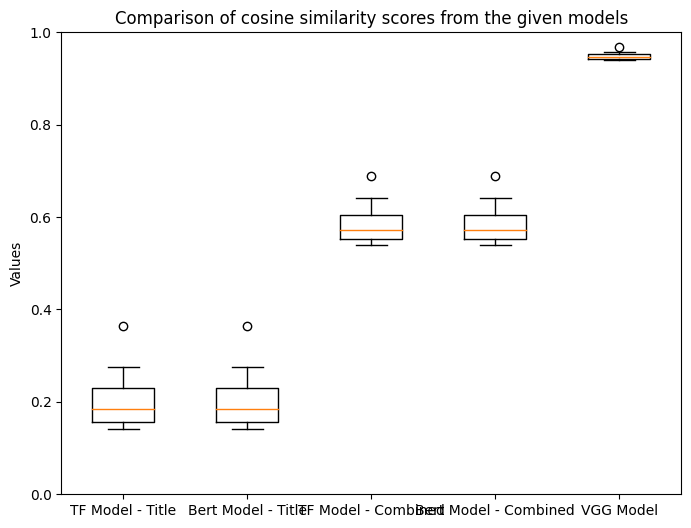

In [ ]:
box_plot_data = [averages_sim_title, averages_sim_bert, averages_sim_combined, averages_sim_bert_combined, averages_sim_vgg]
labels = ['TF Model - Title', 'Bert Model - Title', 'TF Model - Combined', 'Bert Model - Combined', 'VGG Model']

plt.figure(figsize=(8, 6))  # Optional: specifies the size of the figure
plt.boxplot(box_plot_data, labels=labels)
plt.ylim(0, 1)
plt.title('Comparison of cosine similarity scores from the given models')
plt.ylabel('Values')

# Show the plot
plt.show()